In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot
import pandas as pd
import scipy.stats as stats

# EXERCISE -1

In [3]:
df_Anscombe = pd.read_excel('/content/MTH8302-Devoirs-data.xlsx', sheet_name='Anscombe')

In [22]:
df_Anscombe.head()

,ID,c2,X1,Y1,c5,X2,Y2,c8,X3,Y3,c11,X4,Y4
0,1,NaN,10,8.04,NaN,10,9.14,NaN,10,7.46,NaN,8,6.58
1,2,NaN,14,9.96,NaN,14,8.10,NaN,14,8.84,NaN,8,5.76
2,3,NaN,5,5.68,NaN,5,4.74,NaN,5,5.73,NaN,8,7.71
3,4,NaN,8,6.95,NaN,8,8.14,NaN,8,6.77,NaN,8,8.84
4,5,NaN,9,8.81,NaN,9,8.77,NaN,9,7.11,NaN,8,8.47


1(a)

In [26]:
def linear_regression(X, y):
    # Calculate the mean of X and Y
    mean_X = np.mean(X)
    mean_Y = np.mean(y)

    # Calculate β1 (slope)
    numerator = np.sum((X - mean_X) * (y - mean_Y))
    denominator = np.sum((X - mean_X) ** 2)
    beta1 = numerator / denominator

    # Calculate β0 (intercept)
    beta0 = mean_Y - (beta1 * mean_X)

    # Calculate predicted Y values
    Y_pred = beta0 + beta1 * X

    # Calculate the total sum of squares (SStot)
    SStot = np.sum((y - mean_Y) ** 2)

    # Calculate the regression sum of squares (SSreg)
    SSreg = np.sum((Y_pred - mean_Y) ** 2)

    # Calculate residuals
    residuals = y - Y_pred

    # Calculate the residual sum of squares (SSresid)
    SSresid = np.sum(residuals ** 2)

    # Calculate R^2 (coefficient of determination)
    r_squared = SSreg / SStot

    return beta0, beta1, r_squared, SSreg, SSresid, SStot

In [125]:
X1 = df_Anscombe['X1']
X2 = df_Anscombe['X2']
X3 = df_Anscombe['X3']
X4 = df_Anscombe['X4']
Y1 = df_Anscombe['Y1']
Y2 = df_Anscombe['Y2']
Y3 = df_Anscombe['Y3']
Y4 = df_Anscombe['Y4']

In [7]:
linear_regression(X1,Y1), linear_regression(X2,Y2), linear_regression(X3,Y3), linear_regression(X4,Y4)

((3.0000909090909067,
  0.5000909090909093,
  0.6665424595087753,
  27.51000090909093,
  13.762690000000006,
  41.27269090909091),
 (3.000909090909089,
  0.5000000000000001,
  0.6662420337274841,
  27.5,
  13.77629090909091,
  41.27629090909092),
 (3.0024545454545457,
  0.49972727272727274,
  0.6663240410665593,
  27.470008181818184,
  13.75619181818182,
  41.2262),
 (3.0017272727272726,
  0.49990909090909097,
  0.6667072568984657,
  27.490000909090924,
  13.742490000000002,
  41.23249090909091))

In [27]:
linear_regression(X2,Y2)

(3.000909090909089,
 0.5000000000000001,
 0.6662420337274841,
 27.5,
 13.77629090909091,
 41.27629090909092)

1(b)

In [8]:
def plot_scatter(X, Y, title):
    plt.scatter(X, Y)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

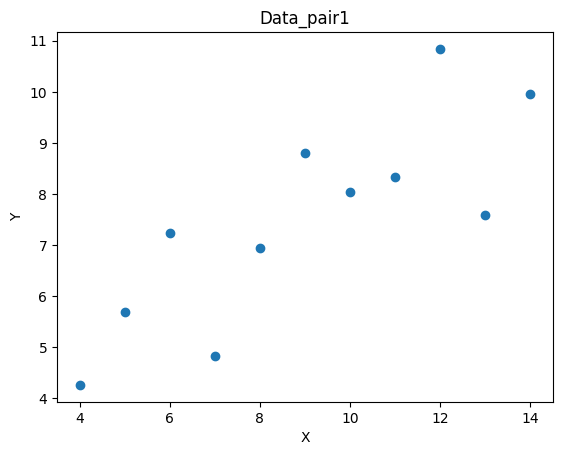

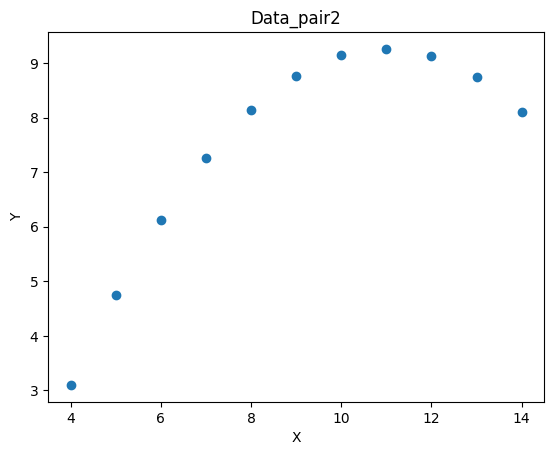

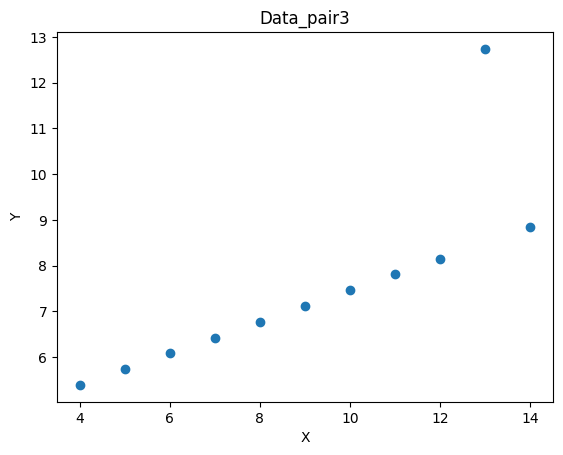

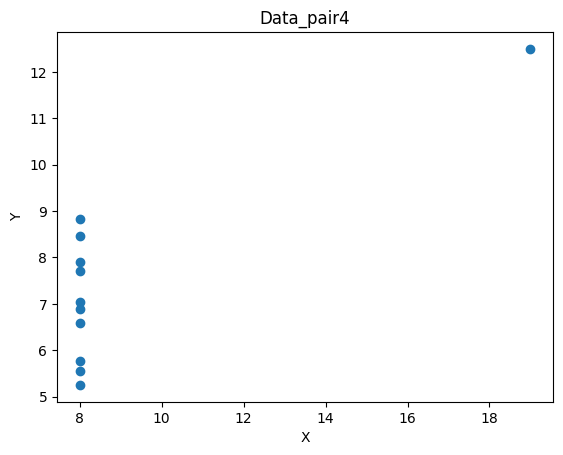

In [107]:
plot_scatter(X1,Y1,'Data_pair1')
plot_scatter(X2,Y2,'Data_pair2')
plot_scatter(X3,Y3,'Data_pair3')
plot_scatter(X4,Y4,'Data_pair4')

In [10]:
linear_regression(X1,Y1)[0]

3.0000909090909067

1(c)

In [11]:
def plot_residuals_vs_X(X, Y, beta0, beta1):
    # Calculate predicted Y values
    Y_pred = beta0 + beta1 * X

    # Calculate residuals
    residuals = Y - Y_pred

    # Plot residuals against X
    plt.scatter(X, residuals)
    plt.title('Residuals vs X')
    plt.xlabel('X')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.show()

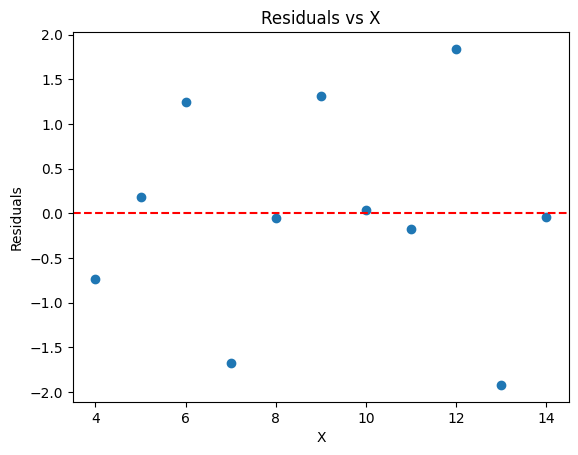

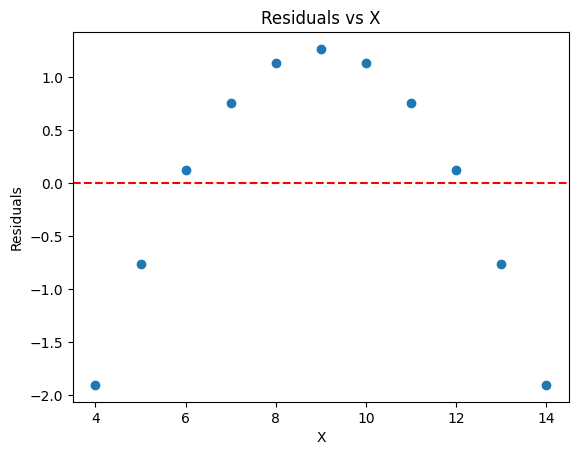

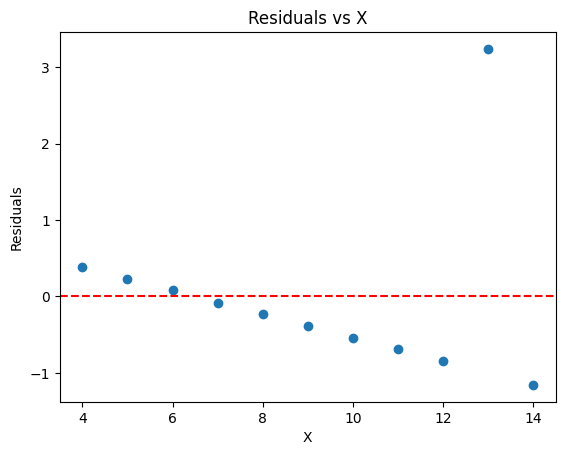

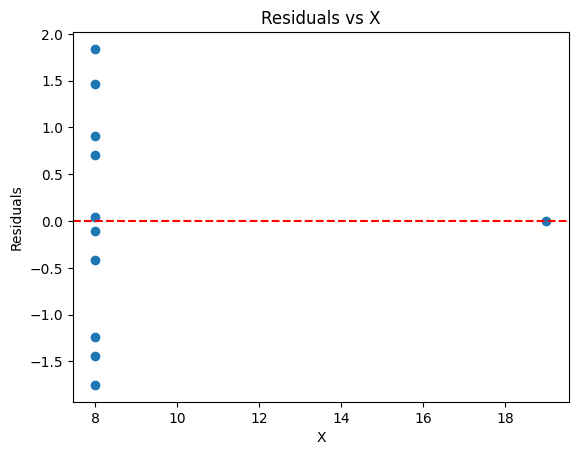

In [12]:
plot_residuals_vs_X(X1,Y1,linear_regression(X1,Y1)[0],linear_regression(X1,Y1)[1])
plot_residuals_vs_X(X2,Y2,linear_regression(X2,Y2)[0],linear_regression(X2,Y2)[1])
plot_residuals_vs_X(X3,Y3,linear_regression(X3,Y3)[0],linear_regression(X3,Y3)[1])
plot_residuals_vs_X(X4,Y4,linear_regression(X4,Y4)[0],linear_regression(X4,Y4)[1])

1(d)

In [13]:
def plot_residuals_gaussian_scale(X, Y, beta0, beta1):
    # Calculate predicted Y values
    Y_pred = beta0 + beta1 * X

    # Calculate residuals
    residuals = Y - Y_pred

    # Calculate standard normal quantiles
    residuals_std = (residuals - np.mean(residuals)) / np.std(residuals)
    quantiles = stats.norm.ppf((np.arange(len(residuals_std)) + 1) / (len(residuals_std) + 1))

    # Plot residuals on Gaussian probability scale
    plt.scatter(quantiles, np.sort(residuals_std))
    plt.title('Residuals on Gaussian Probability Scale')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Residuals')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.show()

1(e)

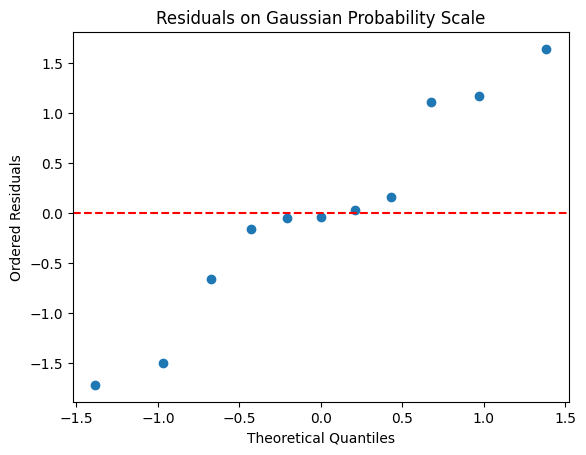

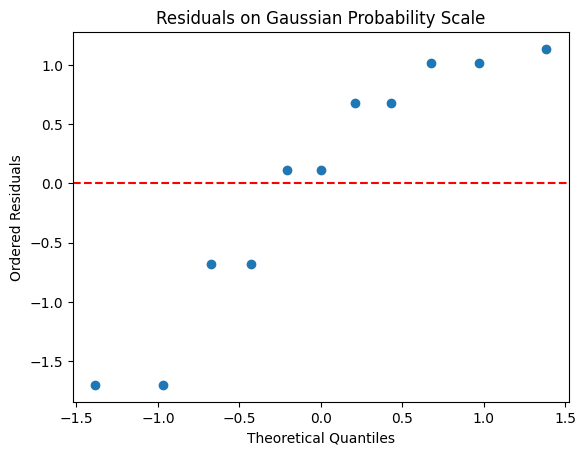

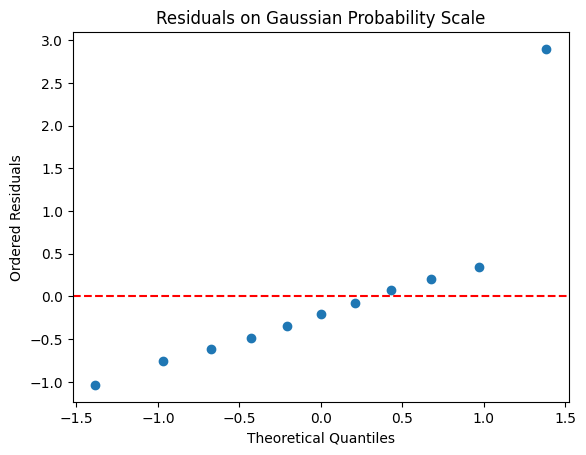

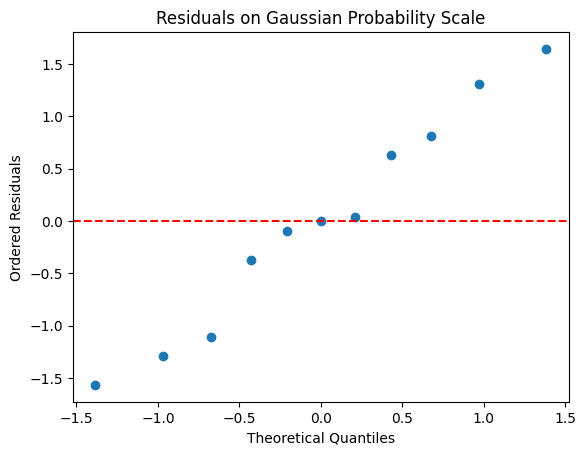

In [14]:
plot_residuals_gaussian_scale(X1,Y1,linear_regression(X1,Y1)[0],linear_regression(X1,Y1)[1])
plot_residuals_gaussian_scale(X2,Y2,linear_regression(X2,Y2)[0],linear_regression(X2,Y2)[1])
plot_residuals_gaussian_scale(X3,Y3,linear_regression(X3,Y3)[0],linear_regression(X3,Y3)[1])
plot_residuals_gaussian_scale(X4,Y4,linear_regression(X4,Y4)[0],linear_regression(X4,Y4)[1])

In [126]:
newX3 = X3.drop(9)
newY3 = Y3.drop(9)

In [127]:
linear_regression(newX3,newY3)

(4.005649350649351,
 0.34538961038961036,
 0.9999931075815326,
 11.022764025974022,
 7.597402597400566e-05,
 11.02284)

### EXERCISE - 2


In [17]:
df_vaccins = pd.read_excel('/content/MTH8302-Devoirs-data.xlsx', sheet_name='Vaccins')

In [29]:
df_vaccins.head()

,ID,répondant,X1_âge,X1_catAge,X2_indSanté,X3_genre,Y_reçuVaccin?,Y,new,X1_catAge2,Y=1,Y=0,n_total,Unnamed: 13,Unnamed: 14
0,1,1,51,52,42,F,oui,1,tableau,52.0,1.0,45.0,46.0,NaN,Un Centre Local de Santé Communautaire (CLSC) ...
1,2,2,59,57,49,H,oui,1,agrégé,57.0,5.0,25.0,30.0,NaN,"Une étude subséquente, un échantillon de 159 p..."
2,3,3,80,70,38,F,oui,1,NaN,62.0,1.0,22.0,23.0,NaN,Le fichier contient les variables:
3,4,4,77,70,54,H,non,0,NaN,67.0,4.0,22.0,26.0,NaN,répondant : numéro variant de 1 à 159 - identi...
4,5,5,71,70,58,H,oui,1,NaN,72.0,13.0,21.0,34.0,NaN,X1_âge : age de la personne


In [19]:
from sklearn.linear_model import LogisticRegression

X_age = df_vaccins['X1_âge'].values.reshape(-1, 1)
y = df_vaccins['Y'].values


model = LogisticRegression()

# Fit the model
model.fit(X_age, y)

# Print coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[0.10865534]]
Intercept: [-8.7378005]


In [95]:
import numpy as np
from sklearn.metrics import mean_squared_error

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features,))
        self.bias = 0

        # gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # gradient descent
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw[:,0]
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [86]:
model = LogisticRegression()

# Fit the model to your training data
model.fit(X_age, y)

# Make predictions on the test data
y_pred = model.predict(X_age)

# Evaluate the model
accuracy = np.mean(y_pred == y)
print("Accuracy:", accuracy)


# Calculate the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y, y_pred, squared=False)

print("Root Mean Square Error (RMSE):", rmse)

Accuracy: 0.2826628693485226
Root Mean Square Error (RMSE): 0.8203389390019026


In [91]:
rows_with_H_genre = df_vaccins[df_vaccins['X3_genre'] == 'H']

X_age_H = rows_with_H_genre['X1_âge'].values.reshape(-1, 1)
y_H = rows_with_H_genre['Y'].values

model_H = LogisticRegression()

# Fit the model
model_H.fit(X_age_H, y_H)

y_pred_H = model.predict(X_age_H)

# Evaluate the model
accuracy = np.mean(y_pred_H == y_H)
print("Accuracy:", accuracy)


# Calculate the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_H, y_pred_H, squared=False)

print("Root Mean Square Error (RMSE):", rmse)

Accuracy: 0.32051282051282054
Root Mean Square Error (RMSE): 0.8243101233681287


In [ ]:
rows_with_H_genre = df_vaccins[df_vaccins['X3_genre'] == 'H']


model_H = LogisticRegression()

# Fit the model
model_H.fit(rows_with_H_genre['X1_âge'].values.reshape(-1, 1), rows_with_H_genre['Y'].values)

# Print coefficients and intercept
print("Coefficients:", model_H.coef_)
print("Intercept:", model_H.intercept_)

Coefficients: [[0.11325433]]
Intercept: [-8.91252977]


In [92]:
rows_with_F_genre = df_vaccins[df_vaccins['X3_genre'] == 'F']

X_age_F = rows_with_H_genre['X1_âge'].values.reshape(-1, 1)
y_F = rows_with_H_genre['Y'].values

model_F = LogisticRegression()

# Fit the model
model_F.fit(X_age_F, y_F)

y_pred_F = model_F.predict(X_age_F)

# Evaluate the model
accuracy = np.mean(y_pred_F == y_F)
print("Accuracy:", accuracy)


# Calculate the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_F, y_pred_F, squared=False)

print("Root Mean Square Error (RMSE):", rmse)

Accuracy: 0.8076923076923077
Root Mean Square Error (RMSE): 0.4385290096535146


In [ ]:
rows_with_F_genre = df_vaccins[df_vaccins['X3_genre'] == 'F']


model_F = LogisticRegression()

# Fit the model
model_F.fit(rows_with_F_genre['X1_âge'].values.reshape(-1, 1), rows_with_F_genre['Y'].values)

# Print coefficients and intercept
print("Coefficients:", model_F.coef_)
print("Intercept:", model_F.intercept_)

Coefficients: [[0.09657001]]
Intercept: [-8.13129394]


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Sample data
X_age = X_age
X1_catAge = df_vaccins['X1_catAge'].values.reshape(-1, 1)
X2_indSanté = df_vaccins['X2_indSanté'].values.reshape(-1, 1)
X3_genre = df_vaccins['X3_genre'].replace({'H': 0, 'F': 1}).values.reshape(-1, 1)

# Concatenate feature columns
X = np.concatenate((X_age, X1_catAge,X2_indSanté, X3_genre ), axis=1)

y = df_vaccins['Y'].values  # Target column

# Initialize logistic regression model
model_all = LogisticRegression()

# Fit the model
model_all.fit(X, y)

# Print coefficients and intercept
print("Coefficients:", model_all.coef_)
print("Intercept:", model_all.intercept_)

Coefficients: [[ 0.09491459 -0.03459614 -0.09899711 -0.35791479]]
Intercept: [-0.0169612]


In [98]:
model_all = LogisticRegression()

X_age = X_age
X1_catAge = df_vaccins['X1_catAge'].values.reshape(-1, 1)
X2_indSanté = df_vaccins['X2_indSanté'].values.reshape(-1, 1)
X3_genre = df_vaccins['X3_genre'].replace({'H': 0, 'F': 1}).values.reshape(-1, 1)

# Concatenate feature columns
X = np.concatenate((X_age, X1_catAge,X2_indSanté, X3_genre ), axis=1)

model_all.fit(X, y)

y_pred_all = model_all.predict(X)

# Evaluate the model
accuracy = np.mean(y_pred_all == y)
print("Accuracy:", accuracy)


# Calculate the Root Mean Square Error (RMSE)
rmse = mean_squared_error(y, y_pred_all, squared=False)

print("Root Mean Square Error (RMSE):", rmse)

Accuracy: 0.6690399905067046
Root Mean Square Error (RMSE): 0.4952605565436486


<ipython-input-95-f29c424e874a>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


### EXERCISE 3


In [100]:
df_croissance = pd.read_excel('/content/MTH8302-Devoirs-data.xlsx', sheet_name='Croissance')

In [101]:
df_croissance.head()

,ID,x(sem),Y(poids)
0,1,1,16.08
1,2,2,33.83
2,3,3,65.80
3,4,4,97.20
4,5,5,191.55


In [102]:
ID = df_croissance["x(sem)"]
y_poids = df_croissance["Y(poids)"]

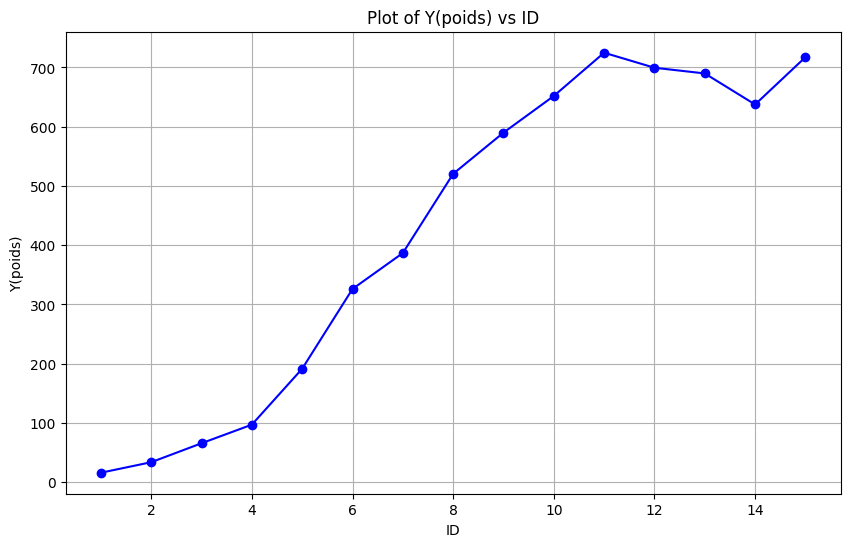

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(ID,y_poids, marker='o', linestyle='-', color='b')
plt.title('Plot of Y(poids) vs ID')
plt.xlabel('ID')
plt.ylabel('Y(poids)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


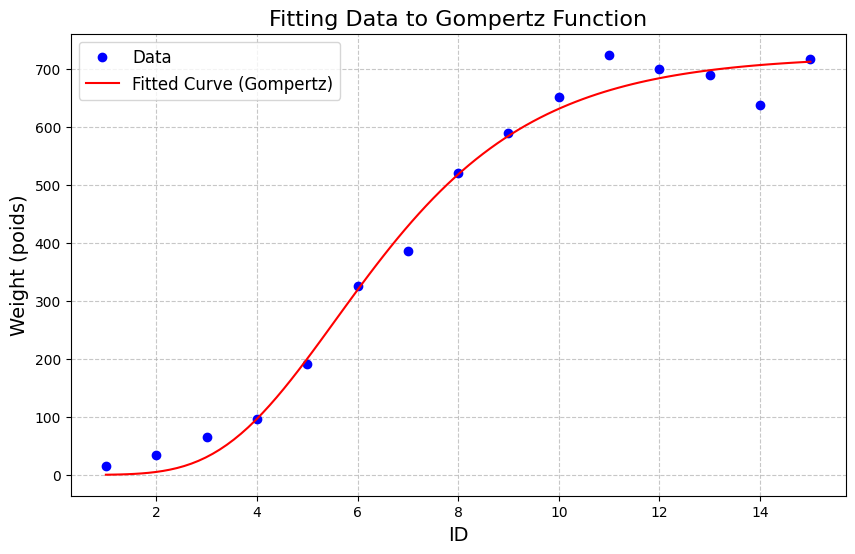

Optimized parameters (a, b, c): [7.23108813e+02 1.21846246e+01 4.50101793e-01]


In [104]:
from scipy.optimize import curve_fit

# Define the Gompertz function
def gompertz_func(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))


# Fit the data to the Gompertz function
popt, pcov = curve_fit(gompertz_func, ID, y_poids, maxfev=10000)

# Get the optimized parameters
a_opt, b_opt, c_opt = popt

# Generate values for the curve using the optimized parameters
x_curve = np.linspace(min(ID), max(ID), 100)
y_curve = gompertz_func(x_curve, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(ID, y_poids, 'bo', label='Data')
plt.plot(x_curve, y_curve, 'r-', label='Fitted Curve (Gompertz)')
plt.title('Fitting Data to Gompertz Function', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Weight (poids)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the optimized parameters
print("Optimized parameters (a, b, c):", popt)


array([7.23108813e+02, 1.21846246e+01, 4.50101793e-01])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


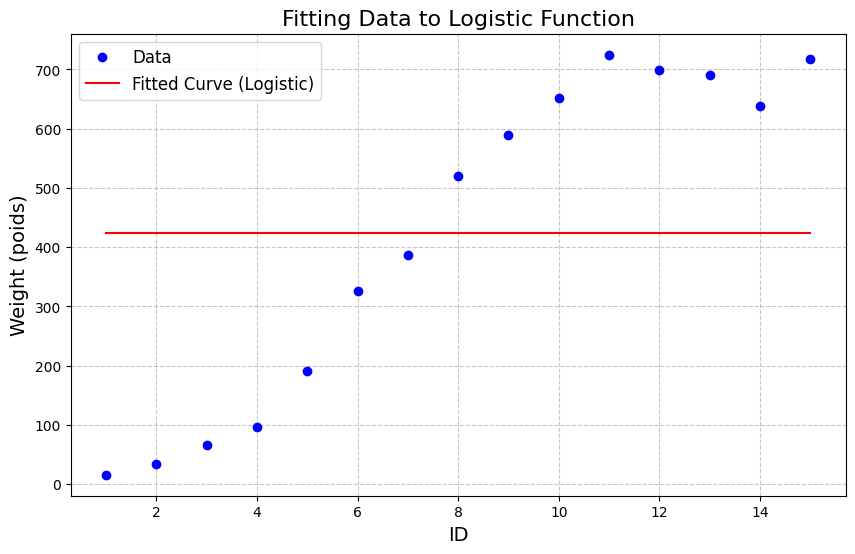

Optimized parameters (a, b, c): [423.29533293  40.46090214  -3.30239864]


In [ ]:
# Define the logistic function
def logistic_func(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

#Fit the data to the logistic function
popt, pcov = curve_fit(logistic_func, ID, y_poids, maxfev=10000)

# Get the optimized parameters
a_opt, b_opt, c_opt = popt

# Generate values for the curve using the optimized parameters
x_curve = np.linspace(min(ID), max(ID), 100)
y_curve = logistic_func(x_curve, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(ID, y_poids, 'bo', label='Data')
plt.plot(x_curve, y_curve, 'r-', label='Fitted Curve (Logistic)')
plt.title('Fitting Data to Logistic Function', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Weight (poids)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the optimized parameters
print("Optimized parameters (a, b, c):", popt)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


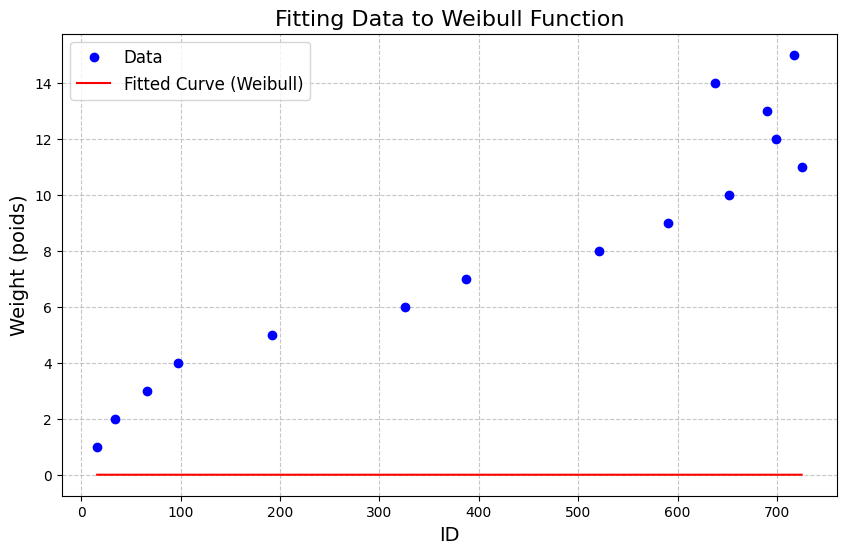

Optimized parameters (a, b, c, q): [3.02584838 0.94580367 1.1431957  3.00616764]


In [ ]:
# Define the Weibull function
def weibull_func(x, a, b, c, q):
    return a * (b / c) * ((x - q) / c) ** (b - 1) * np.exp(-((x - q) / c) ** b)

# Fit the data to the Weibull function
popt, _ = curve_fit(weibull_func, ID, y_poids)

# Generate values for the curve using the optimized parameters
x_curve = np.linspace(min(y_poids), max(y_poids), 100)
y_curve = weibull_func(x_curve, *popt)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(y_poids, ID, 'bo', label='Data')
plt.plot(x_curve, y_curve, 'r-', label='Fitted Curve (Weibull)')
plt.title('Fitting Data to Weibull Function', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Weight (poids)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the optimized parameters
print("Optimized parameters (a, b, c, q):", popt)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


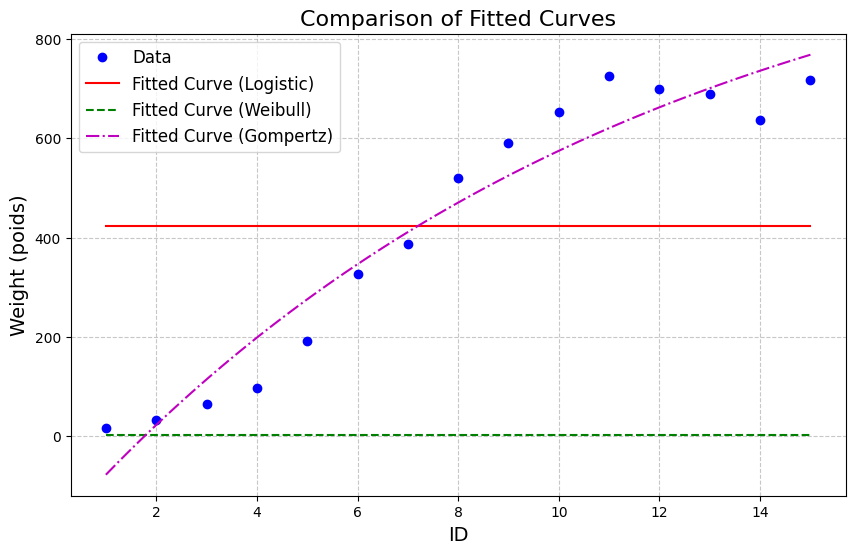

Optimized parameters (Logistic): [423.29533293  40.46090214  -3.30239864]
Optimized parameters (Weibull): [1.36270343e+04 9.99976948e-01 5.07692065e+03 5.73079874e-01]
Optimized parameters (Gompertz): [1.12238213e+03 1.30883944e+03 8.71222131e-02]


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the logistic function
logistic_func = lambda x, a, b, c: a / (1 + np.exp(-b * (x - c)))

# Define the Weibull function
def weibull_func(x, a, b, c, q):
    return a * (b / c) * ((x - q) / c) ** (b - 1) * np.exp(-((x - q) / c) ** b)

# Define the Gompertz function
gompertz_func = lambda x, a, b, c: a - b * np.exp(-c * x)

# Provided data
x_data = ID
y_data = y_poids

# Fit the data to each function
popt_log, _ = curve_fit(logistic_func, x_data, y_data)
popt_weibull, _ = curve_fit(weibull_func, x_data, y_data)
popt_gompertz, _ = curve_fit(gompertz_func, x_data, y_data)

# Generate values for the curves using the optimized parameters
x_curve = np.linspace(min(x_data), max(x_data), 100)
y_curve_log = logistic_func(x_curve, *popt_log)
y_curve_weibull = weibull_func(x_curve, *popt_weibull)
y_curve_gompertz = gompertz_func(x_curve, *popt_gompertz)

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'bo', label='Data')
plt.plot(x_curve, y_curve_log, 'r-', label='Fitted Curve (Logistic)')
plt.plot(x_curve, y_curve_weibull, 'g--', label='Fitted Curve (Weibull)')
plt.plot(x_curve, y_curve_gompertz, 'm-.', label='Fitted Curve (Gompertz)')
plt.title('Comparison of Fitted Curves', fontsize=16)
plt.xlabel('ID', fontsize=14)
plt.ylabel('Weight (poids)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print the optimized parameters for each function
print("Optimized parameters (Logistic):", popt_log)
print("Optimized parameters (Weibull):", popt_weibull)
print("Optimized parameters (Gompertz):", popt_gompertz)
